<a href="https://colab.research.google.com/github/misoc-mml/ncrm-causality-2022/blob/main/labs/part_1/Tutorial_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - tutorial

This is a guided example that involves a classification problem - spirals dataset. This data is completely synthetic.

## The plan

1. Import necessary packages.
2. Load and explore the dataset.
3. Perform data pre-processing (transformations, scaling, splitting).
4. Train and evaluate the models.

## Step 1 - packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
def _trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

def plot_dist(data, bins=10, size=(12, 8)):
    sq = math.sqrt(data.shape[1])
    d_ceil = math.ceil(sq)
    d_floor = math.floor(sq)

    if (d_ceil * d_floor) >= data.shape[1]:
        n_rows = d_floor
        n_cols = d_ceil
    else:
        n_rows = n_cols = d_ceil

    fig, axs = plt.subplots(n_rows, n_cols, figsize=size)
    axs = _trim_axs(axs, data.shape[1])

    for i, ax in enumerate(axs):
        ax.hist(data[:, i], bins=bins)
    
    fig.tight_layout()
    plt.show()

## Step 2 - data

You can either upload the file manually to Colab (everytime you start the notebook), or use the following command that does that for you.

In [3]:
!wget https://github.com/misoc-mml/ncrm-causality-2022/raw/main/labs/part_1/data/spirals.npz

--2022-10-07 13:54:45--  https://github.com/misoc-mml/ncrm-causality-2022/raw/main/labs/part_1/data/spirals.npz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/misoc-mml/ncrm-causality-2022/main/labs/part_1/data/spirals.npz [following]
--2022-10-07 13:54:45--  https://raw.githubusercontent.com/misoc-mml/ncrm-causality-2022/main/labs/part_1/data/spirals.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48490 (47K) [application/octet-stream]
Saving to: ‘spirals.npz’

spirals.npz         100%[===================>]  47.35K  --.-KB/s    in 0.005s  

2022-10-07 13:54:45 (8.86 MB/s) - ‘spirals.npz’ s

In [4]:
data = np.load('spirals.npz')

In [5]:
data.files

['x', 'y']

In [6]:
print(data['x'].shape)
print(data['y'].shape)

(2000, 2)
(2000,)


In [7]:
X = data['x']
y = data['y']

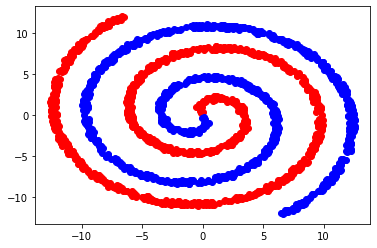

In [8]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue')

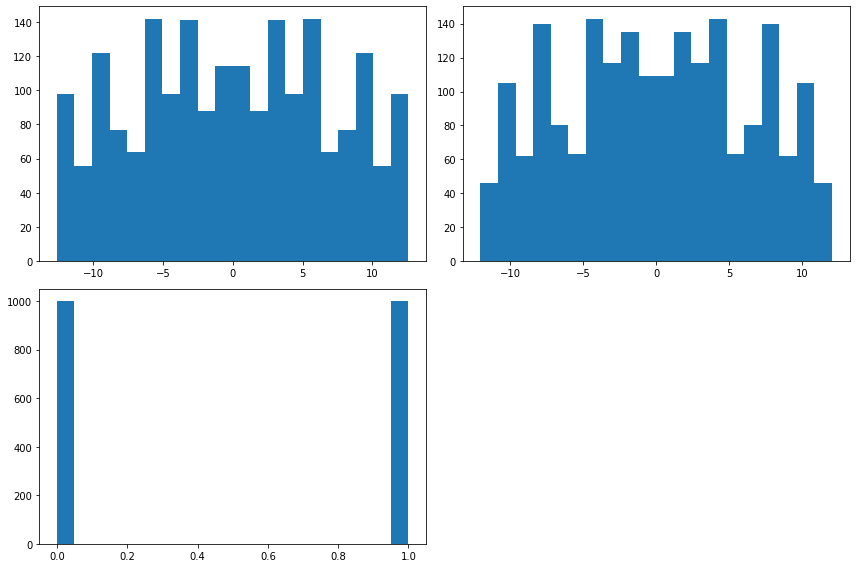

In [9]:
plot_dist(np.concatenate([X, y.reshape(-1, 1)], axis=1), 20)

## Step 3 - data pre-processing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 2)
(1600,)
(400, 2)
(400,)


## Step 4 - train and evaluate

We train the following models here:
1. Dummy model (sanity check).
2. Logistic regression.
3. Decision tree.
4. Random forest.

General approach:
1. Train on the training data (X and y).
2. Make predictions on the test data (X).
3. Compare obtained predictions to the ground truth (y) -- accuracy.

In [11]:
dc = DummyClassifier()
dc.fit(X_train, y_train)

y_pred_test = dc.predict(X_test)

dc_acc = accuracy_score(y_test, y_pred_test)
print(dc_acc)

0.4975


In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred_test)
print(lr_acc)

0.58


In [13]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_test = dt.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred_test)
print(dt_acc)

0.98


In [14]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_test = rf.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred_test)
print(rf_acc)

0.9925


## Hyperparameter optimisation?

This can be done similarly to the regresison example.